In [1]:
import requests
import time
import json
import pandas as pd

from PIL import Image
from IPython.display import display

# Examples
- <a href="#health" style="font-size:20px;">/health</a>
- <a href="#analyzeDocument" style="font-size:20px;">/analyzeDocument</a>
- <a href="#analyzeResults" style="font-size:20px;">/analyzeResults</a>


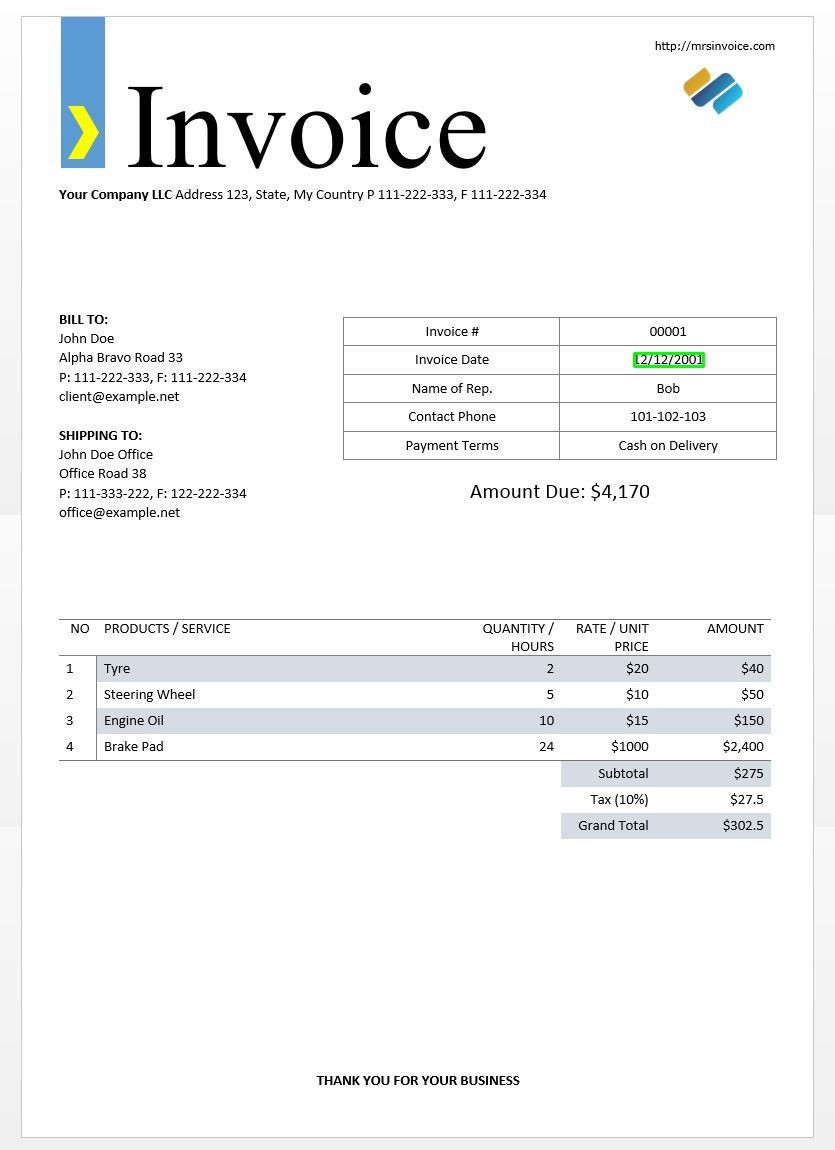

In [3]:
container_url = "http://localhost:8000" # URL of the container
file_path = "tests/test_image.jpg" # Path to the image file

image = Image.open(file_path)
display(image)

# /health
<a id="health"></a>

In [14]:
# Send a GET request to the health endpoint
response = requests.get(f"{container_url}/health")

# Check if the quest was successful
if response.status_code == 200:
    health_status = response.json()
    print(f"Health Check: {health_status}")
else:
    print(f"Failed to get health status. Status code: {response.status_code}, Response: {response.text}")


Health Check: {'status': 'healthy'}


# /analyzeDocument
<a id="analyzeDocument"></a>

In [24]:
# Read the file and send a POST request to the analyzeDocument endpoint
with open(file_path, "rb") as file:
    files = {'file': file}
    response = requests.post(f"{container_url}/analyzeDocument/", files=files)
    print(f"Request URL: {container_url}/analyzeDocument/")

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    task_id = data["task_id"]
    print(f"File uploaded successfully. \nTask ID: {task_id}")
else:
    print("Failed to upload image.")
    print("Status code:", response.status_code)
    print("Response:", response.text)

Request URL: http://localhost:8000/analyzeDocument/
File uploaded successfully. 
Task ID: 84178e3b-8537-48fe-af9d-66389f3a38ae


# /analyzeResults
<a id="analyzeResults"></a>

In [29]:
# Poll the result endpoint until the processing is done
while True:
    result_response = requests.get(f"{container_url}/analyzeResults/{task_id}")
    if result_response.status_code == 200:
        result_data = result_response.json()
        if result_data["state"] == "SUCCESS":
            print("OCR result:", json.dumps(result_data, indent=4))
            break
        elif result_data["state"] == "PENDING":
            print("Processing is still in progress. Retrying in 5 seconds...")
            time.sleep(5)
        else:
            print("Unexpected state:", result_data["state"])
            break
    else:
        print(f"Failed to retrieve result. Status code: {result_response.status_code}")
        break

OCR result: {
    "state": "SUCCESS",
    "file_name": "invoice.jpg",
    "start_datetime": "2024-06-01T08:39:51.487650",
    "end_datetime": "2024-06-01T08:39:52.213507",
    "status": "completed",
    "width": 835,
    "height": 1150,
    "results": [
        {
            "level": 1,
            "page_num": 1,
            "block_num": 0,
            "par_num": 0,
            "line_num": 0,
            "word_num": 0,
            "left": 0,
            "top": 0,
            "width": 835,
            "height": 1150,
            "conf": -1,
            "text": ""
        },
        {
            "level": 2,
            "page_num": 1,
            "block_num": 1,
            "par_num": 0,
            "line_num": 0,
            "word_num": 0,
            "left": 656,
            "top": 41,
            "width": 119,
            "height": 11,
            "conf": -1,
            "text": ""
        },
        {
            "level": 3,
            "page_num": 1,
            "block_num": 1,
    

## parsing results to table

In [35]:
ocr_results = result_data.get("results", [])
df = pd.DataFrame(ocr_results)
df.head(20)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,835,1150,-1,
1,2,1,1,0,0,0,656,41,119,11,-1,
2,3,1,1,1,0,0,656,41,119,11,-1,
3,4,1,1,1,1,0,656,41,119,11,-1,
4,5,1,1,1,1,1,656,41,119,11,60,http://mrsinvoice.com
5,2,1,2,0,0,0,680,64,67,54,-1,
6,3,1,2,1,0,0,680,64,67,54,-1,
7,4,1,2,1,1,0,680,64,67,54,-1,
8,5,1,2,1,1,1,680,64,67,54,95,
9,2,1,3,0,0,0,61,17,425,152,-1,
